# Predicting price of a used vehicle using machine learning models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [188]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [189]:
len(df)

509577

# TASK 1

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

removing duplicates as there can be multiple postings for a single vehicle

In [190]:
df=df.drop_duplicates(['region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'])
len(df)

473963

Removing url columns as the main information has been put in a different column. Removing price variable as it is the target variable.

In [191]:
x=df.drop(['url','region_url','image_url','price'], 1)

Price is the target variable and hence storing it in y

In [192]:
y=df['price']

computing missing values to further check if all the features can be used

In [193]:
missing=pd.isna(x).sum()
missing

id                   0
region               0
year              1266
manufacturer     20397
model             7322
condition       215823
cylinders       184687
fuel              3524
odometer         82617
title_status      2732
transmission      3714
vin             189599
drive           131869
size            317124
type            127960
paint_color     150117
description         16
county          473963
state                0
lat               9904
long              9904
dtype: int64

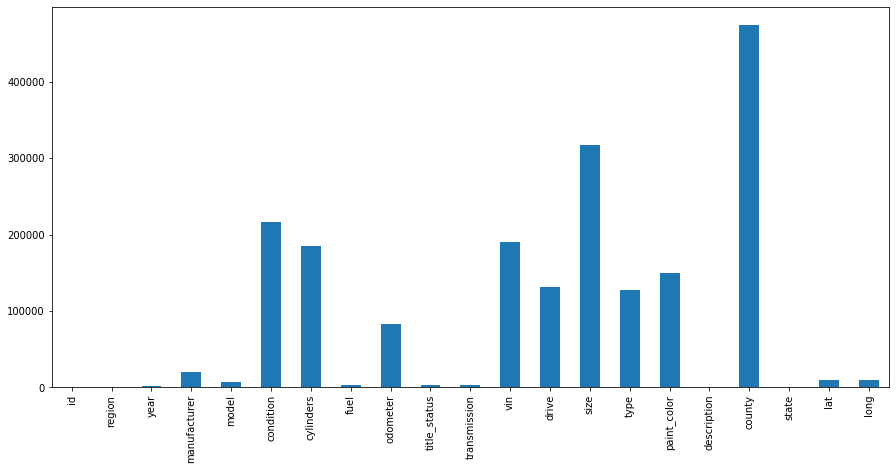

In [194]:
plt.rcParams["figure.figsize"] = (15,7)
missing.plot(kind='bar')

removing county as all the values are missing 

In [195]:
x=x.drop('county', 1)
x.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long'],
      dtype='object')

removing id and vin as it can lead to target information leakage

In [196]:
x=x.drop(['id','vin'], 1)
x.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'description', 'state', 'lat', 'long'],
      dtype='object')

In [197]:
cnt=x.select_dtypes(exclude=['object'])
cnt.columns #list of continuous features

Index(['year', 'odometer', 'lat', 'long'], dtype='object')

In [198]:
#describe all contiuous features
x.describe()

,year,odometer,lat,long
count,472697.000000,3.913460e+05,464059.000000,464059.000000
mean,2009.617728,1.013198e+05,38.437498,-94.273893
std,8.704141,1.056439e+05,5.877320,17.647571
min,1900.000000,0.000000e+00,-82.688100,-165.935000
25%,2007.000000,4.900000e+04,34.526800,-108.387000
50%,2011.000000,9.411650e+04,39.140100,-88.486500
75%,2015.000000,1.382750e+05,42.447900,-81.194900
max,2021.000000,1.000000e+07,81.569300,94.124800


In [199]:
# Describing all the Categorical Features
cat=x.select_dtypes(include=['object'])
cat.describe(include=['O'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,description,state
count,473963,453566,466641,258140,289276,470439,471231,470249,342094,156839,346003,323846,473947,473963
unique,403,43,35852,6,8,5,6,3,3,4,13,12,427803,51
top,fayetteville,ford,f-150,excellent,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ð¨SPECIAL SALE THIS MONTHð¨ â â â Buy*...,ca
freq,3975,86273,10837,128816,104617,410168,452649,424257,159920,84506,87208,83903,85,48611


In [203]:
a=x.drop(['region','model','description'],1)

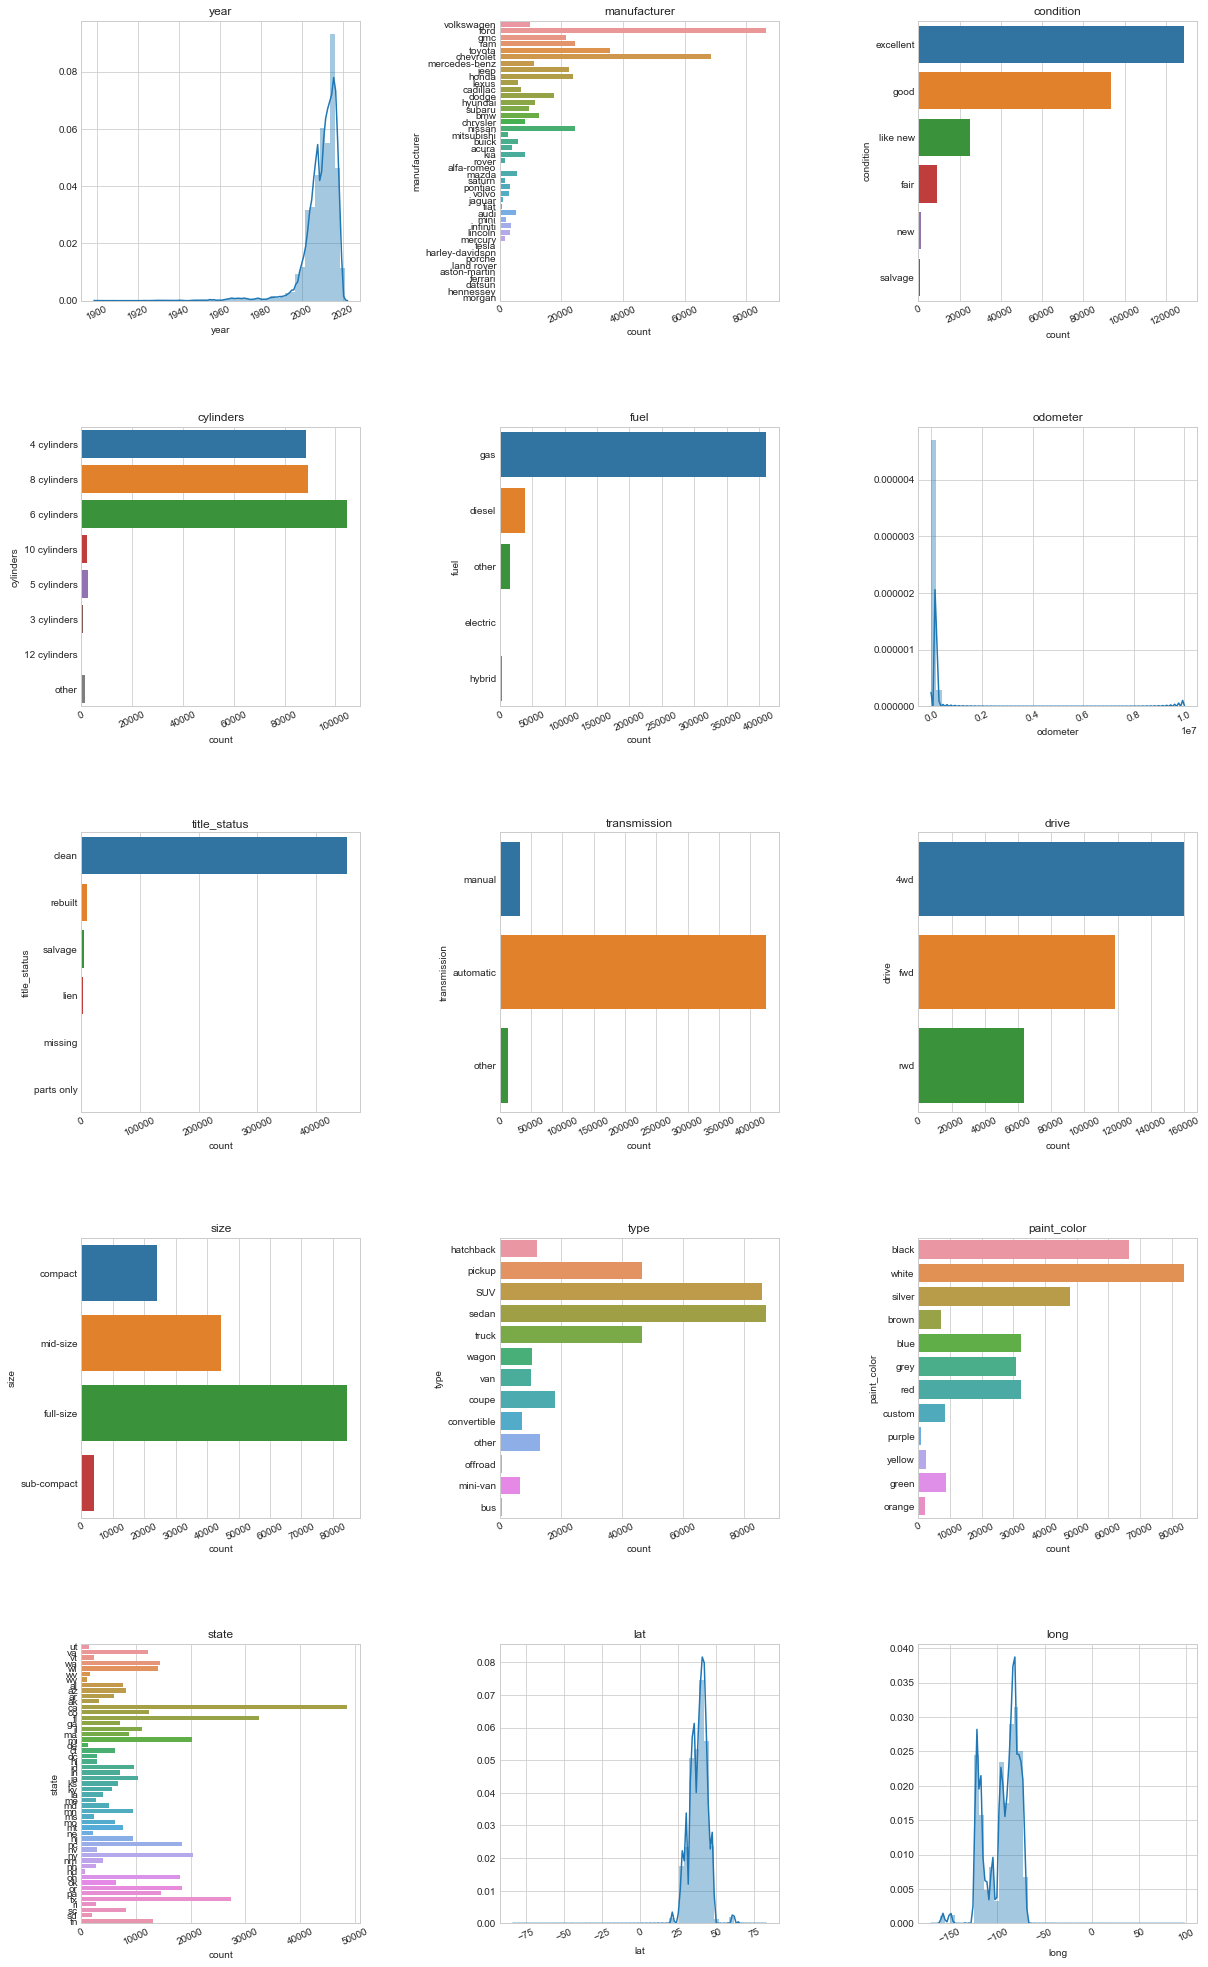

In [208]:
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(a, cols=3, width=20, height=35, hspace=0.45, wspace=0.5)

In [205]:
x.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'description', 'state', 'lat', 'long'],
      dtype='object')

The above features are relevant for making the model and this can be validated by the above distributions. 
Note: Region and Model are important but have not been plotted because they have a lot of unique values.

# TASK 2

In [166]:
len(df)

473963

In [167]:
df1=(df[~(df['price']==0)])
df1=(df1[~(df1['price']>=100000000)])#price outliers
df2=df1[~(df1['price']==1)]


added a new column descriptionlen consisting of length of the values in the description column

In [168]:
df2=df2[df2['description'].notna()]
df2=df2[~(df2['description'].str.isdigit())]
df2['descriptionlen'] = [len(n) for n in df2['description']]

In [169]:
len(df2)

430892

In [170]:
x=df2[['region', 'year','descriptionlen','fuel',  'title_status', 'transmission', 'state','lat','long']]
x.columns

Index(['region', 'year', 'descriptionlen', 'fuel', 'title_status',
       'transmission', 'state', 'lat', 'long'],
      dtype='object')

In [171]:
y=df2['price']
y

0         17899
2         46463
4         49999
5         13999
6         34500
          ...  
509572    15476
509573     9881
509574    24895
509575    32500
509576    12900
Name: price, Length: 430892, dtype: int64

pre processing

In [172]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [173]:
cnt=list(x.columns[x.dtypes !=object])
cnt

['year', 'descriptionlen', 'lat', 'long']

In [174]:
cat=list(x.select_dtypes(object).columns)
cat

['region', 'fuel', 'title_status', 'transmission', 'state']

In [175]:
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_selector



In [176]:
cont_preprocessing = make_pipeline(
    SimpleImputer(),
    StandardScaler())

In [177]:
preprocess = make_column_transformer(
    (SimpleImputer(strategy='most_frequent'),cat),
    (cont_preprocessing,cnt))

In [178]:
preprocess1 = make_column_transformer(
    (TargetEncoder(),['region']),
    (OneHotEncoder(handle_unknown='ignore',sparse=False),['fuel', 'title_status', 'transmission', 'state']),remainder='passthrough')

In [179]:
colname=cat+cnt
colname

['region',
 'fuel',
 'title_status',
 'transmission',
 'state',
 'year',
 'descriptionlen',
 'lat',
 'long']

In [ ]:
te =  preprocess.fit(X_train, y_train)
n=pd.DataFrame(te.transform(X_train),columns=colname)
n

In [181]:
pd.isna(n).sum()

region            0
fuel              0
title_status      0
transmission      0
state             0
year              0
descriptionlen    0
lat               0
long              0
dtype: int64

In [182]:
pd.isna(y_train).sum()

0

In [ ]:
y_train = y_train.reset_index(drop=True)
y_train

In [184]:
len(y_train)

323169

In [185]:
lr = make_pipeline(preprocess1,linear_model.LinearRegression())
scores = cross_val_score(lr, n, y_train,cv=5)
print(scores)
np.mean(scores)

[0.00445614 0.00072643 0.00456053 0.00682158 0.00110762]


0.0035344596695252584

In [ ]:
ntest=pd.DataFrame(te.transform(X_test),columns=colname)
ntest

In [187]:
lr.fit(n, y_train)
lr.score(ntest,y_test)

0.006975772841038786

# TASK 3

In [8]:
len(df)

473963

In [7]:
df.describe(include=['O'])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,state
count,509577,509577,509577,486813,501588,277643,309894,505592,506515,505858,302152,365434,167574,368046,344871,509563,509561,509577
unique,509577,403,413,43,35852,6,8,5,6,3,180145,3,4,13,12,349468,427803,51
top,https://fayetteville.craigslist.org/ctd/d/toyo...,fayetteville,https://modesto.craigslist.org,ford,f-150,excellent,6 cylinders,gas,clean,automatic,WDC0G4JB4HF164180,4wd,full-size,sedan,white,https://images.craigslist.org/00i0i_ChcqziILO2...,CLEAN TITLE NO ACCEDINTS 3 YEARS WARRANTY D...,ca
freq,1,4501,2992,92601,11341,140663,111940,441688,487040,457659,114,170482,90481,93225,89322,167,160,52780


In [8]:
df.describe(exclude=['O'])

,id,price,year,odometer,county,lat,long
count,5.095770e+05,5.095770e+05,508050.000000,4.172530e+05,0.0,499285.000000,499285.000000
mean,7.044176e+09,5.479684e+04,2009.662236,1.017300e+05,NaN,38.453818,-94.313886
std,4.937219e+06,9.575025e+06,8.567953,1.073790e+05,NaN,5.902152,17.717653
min,6.995212e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-82.688100,-165.935000
25%,7.040802e+09,3.995000e+03,2007.000000,4.948800e+04,NaN,34.557400,-108.506000
50%,7.045325e+09,9.377000e+03,2011.000000,9.489400e+04,NaN,39.145300,-88.678800
75%,7.048556e+09,1.795500e+04,2015.000000,1.387780e+05,NaN,42.449000,-81.111400
max,7.050103e+09,3.600029e+09,2021.000000,1.000000e+07,NaN,81.569300,94.124800


In [6]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [40]:
finaldf=df.drop(['id','vin','url','region_url','image_url','county'], 1)
finaldf.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long'],
      dtype='object')

dealing with price column

The target variable of this project is Price. Therefore, any records where price is null would be irrelevant. 
Check to see if the dataset contains null prices.

In [10]:
pd.isna(finaldf['price']).sum()

0

In [41]:
finaldf=(finaldf[~(finaldf['price']==0)])#removing rows which have price=0

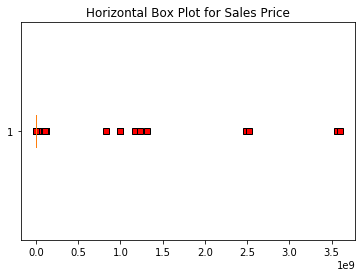

In [9]:
red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
ax.set_title('Horizontal Box Plot for Sales Price')
ax.boxplot(finaldf.price, vert=False, flierprops=red_square)
plt.show()

In [42]:
finaldf=(finaldf[~(finaldf['price']>=100000000)])#outlier removal

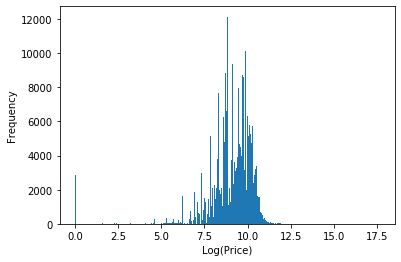

In [11]:
plt.hist(np.log(finaldf['price']),bins="auto")
plt.xlabel('Log(Price)')
plt.ylabel('Frequency');

In [43]:
finaldf=(finaldf[~(finaldf['price']==1)])#removing price=1 as there is a peak on left

In [44]:
cnt=list(finaldf.columns[finaldf.dtypes !=object])
cnt

['price', 'year', 'odometer', 'lat', 'long']

In [45]:
cat=list(finaldf.columns[finaldf.dtypes ==object])
print(cat)

['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'description', 'state']


dealing with year column

keeping rows without nan values in year column as imputing it is not a very good strategy

In [46]:
finaldf=finaldf[finaldf['year'].notna()]


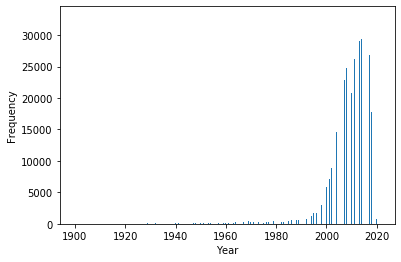

In [16]:
plt.hist((finaldf['year']),bins="auto")
plt.xlabel('Year')
plt.ylabel('Frequency');

In [47]:
finaldf=finaldf[(finaldf['year']>=1980) & (finaldf['year']<=2020)]

dealing with odometer column

In [48]:
finaldf=(finaldf[~(finaldf['odometer']==0)])

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


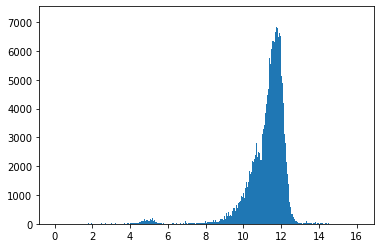

In [19]:
plt.hist(np.log(finaldf['odometer']),bins="auto");

In [49]:
finaldf=finaldf[~(finaldf['odometer']>9000000)]#very high odometer readings

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


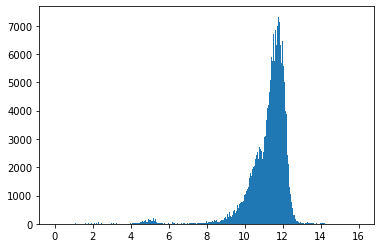

In [19]:
plt.hist(np.log(finaldf['odometer']),bins="auto");

In [50]:
finaldf=finaldf[~(finaldf['odometer']<=500)] #added one more condition for odometer

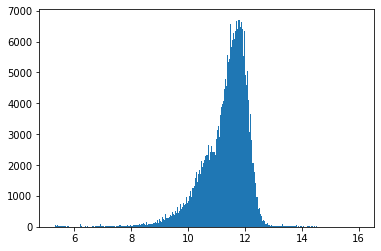

In [23]:
plt.hist(np.log(a['odometer']),bins="auto");

dealing with description column

In [51]:
finaldf=finaldf[finaldf['description'].notna()]
finaldf=finaldf[~(finaldf['description'].str.isdigit())]
finaldf['namelen'] = [len(n) for n in finaldf['description']]# creating a new column consisting of length of desciption column

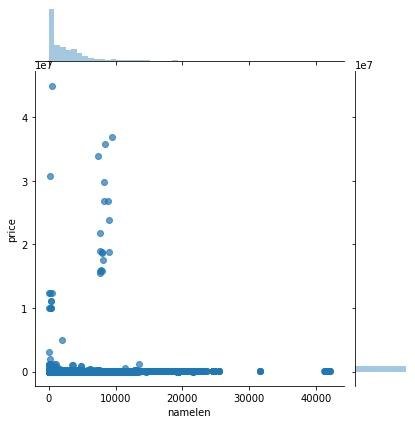

In [24]:
import seaborn as sns
sns.jointplot(x='namelen', 
                   y='price',
                   data=finaldf[['namelen','price']],alpha=0.7)


it can seen that length of the description also has an effect on the sales price

In [52]:
finaldf=finaldf.drop(['description'],axis=1)

In [53]:
pd.isna(finaldf).sum()

region               0
price                0
year                 0
manufacturer     15465
model             5685
condition       182553
cylinders       161371
fuel              2781
odometer         69588
title_status      2197
transmission      3186
drive           115480
size            277386
type            112157
paint_color     128746
state                0
lat               4830
long              4830
namelen              0
dtype: int64

In [54]:
len(finaldf)

415572

In [21]:
finaldf.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'namelen'],
      dtype='object')

binning price column with quantile values used while stratify in train-test split

In [55]:
quantile = list(finaldf.price.quantile([0, 0.25, 0.5, 0.75, 1.0]))
y_binned = []
for price in finaldf['price']:
    if price<=quantile[1]:y_binned.append(1)
    elif price<=quantile[2]:y_binned.append(2)
    elif price<=quantile[3]:y_binned.append(3)
    else: y_binned.append(4)

In [56]:
x=finaldf.drop(['price'],axis=1)
x.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'lat', 'long', 'namelen'],
      dtype='object')

In [57]:
y=finaldf['price']
y.head()

0    17899
2    46463
4    49999
5    13999
6    34500
Name: price, dtype: int64

In [58]:
cnt=list(x.columns[x.dtypes !=object])
cnt

['year', 'odometer', 'lat', 'long', 'namelen']

In [59]:
cat=list(x.columns[x.dtypes ==object])
print(cat)

['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


creating a new category - not_available for those columns which have more than 1 lakh missing values

In [60]:
x['condition'].fillna(value='not_available', inplace=True)
x['cylinders'].fillna(value='not_available', inplace=True)
x['drive'].fillna(value='not_available', inplace=True)
x['size'].fillna(value='not_available', inplace=True)
x['type'].fillna(value='not_available', inplace=True)
x['paint_color'].fillna(value='not_available', inplace=True)

In [61]:
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_selector


In [62]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=0,stratify=y_binned)
cont_preprocessing = make_pipeline(
    SimpleImputer(),StandardScaler())
cat_remaining=['manufacturer','model','fuel', 'title_status', 'transmission']
preprocess = make_column_transformer(
    (SimpleImputer(strategy='most_frequent'),cat_remaining),
    (cont_preprocessing,cnt),remainder='passthrough')
colname=cat_remaining+cnt+['region','condition','cylinders','drive','size','type','paint_color','state']
print(colname)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'year', 'odometer', 'lat', 'long', 'namelen', 'region', 'condition', 'cylinders', 'drive', 'size', 'type', 'paint_color', 'state']


In [63]:
te =  preprocess.fit(X_train, y_train)

In [ ]:
n=pd.DataFrame(te.transform(X_train),columns=colname)
n

In [65]:
n.to_csv('final df.csv')

In [66]:
preprocess1 = make_column_transformer(
    (TargetEncoder(),['model','region']),
    (OneHotEncoder(handle_unknown='ignore',sparse=False),['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']),
    remainder='passthrough')

# TASK 4

TRIED LINEAR REGRESSION

In [33]:
lr = make_pipeline(preprocess1,linear_model.LinearRegression())
scores = cross_val_score(lr, n, y_train,cv=5)
print(scores)
np.mean(scores)

[ 0.00456576 -0.0252211   0.00535932  0.00758274  0.00593521]


-0.00035561409074378323

TRIED  GRADIENT BOOSTING

In [51]:
from sklearn import ensemble
gb = make_pipeline(preprocess1,ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.12, subsample=0.8))
scores = cross_val_score(gb, n, y_train,cv=5)
print(scores)
np.mean(scores)

[0.1657784  0.74389018 0.89285295 0.6020846  0.81429892]


0.6437810102675204

TRIED XGBOOST

In [80]:
import xgboost as xgb

In [130]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.05,max_depth = 7)
regr1 = make_pipeline(preprocess1,xg_reg)
scores = cross_val_score(regr, n, y_train,cv=5)
print(scores)
np.mean(scores)

[19:35:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.19386256 0.71375329 0.85354496 0.7101212  0.83377834]


0.6610120706828579

GRID CV WITH XGBOOST

In [ ]:
xg_reg = xgb.XGBRegressor()
regr = make_pipeline(preprocess1,xg_reg)
params = {
       'xgbregressor__learning_rate' : [0.1,0.01,0.05,0.5],
       'xgbregressor__max_depth': [ 3, 5, 7]
       }
from sklearn.model_selection import GridSearchCV
grid1 = GridSearchCV(regr, param_grid= params,
                   cv=5, return_train_score=True)
grid1.fit(n, y_train)
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))

best mean cross-validation score: 0.684

best parameters: {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 7}

TRIED LIGHT GBM WITH POLYNOMIAL FEATURES (N=2)

In [61]:
import lightgbm as lgb
model = lgb.LGBMRegressor(objective='regression',
                              learning_rate=0.05)
regr = make_pipeline(preprocess1,poly,model)
scores = cross_val_score(regr, n, y_train,cv=5)
print(scores)
np.mean(scores)

[0.54266907 0.57732064 0.62038618 0.56036621 0.70051839]


0.6002520966691041

TRIED LIGHT GBM WITHOUT POLYNOMIAL FEATURES

In [55]:
model = lgb.LGBMRegressor(objective='regression',
                              learning_rate=0.05)
regr = make_pipeline(preprocess1,model)
scores = cross_val_score(regr, n, y_train,cv=5)
print(scores)
np.mean(scores)

[-0.01920817  0.15778394  0.23725284  0.18355505  0.01691208]


0.11525914750898125

TRIED CATBOOST

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=50,learning_rate=0.5,
                          depth=5)
regr = make_pipeline(preprocess1,model)
scores = cross_val_score(regr, n, y_train,cv=5)
#print(scores)
np.mean(scores)

0.7550199588626801

OF ALL THE MODELS TRIED, CATBOOST GAVE THE BEST RESULTS HENCE WE MOVED AHEAD WITH THIS MODEL.

GRIDCV CATBOOST FOR THE PARAMETERS: LEARNING RATE, MAX DEPTH, ITERATIONS

In [ ]:
model = CatBoostRegressor()
regr = make_pipeline(preprocess1,model)
params = {
       'catboostregressor__learning_rate' : [0.8,0.7,0.5],
       'catboostregressor__max_depth': [5,7,9,10],
    'catboostregressor__iterations' : [10,30,50]
       }
from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(regr, param_grid= params,
                   cv=5, return_train_score=True)
grid2.fit(n, y_train)
print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

best mean cross-validation score: 0.794
    
best parameters: {'catboostregressor__iterations': 10, 'catboostregressor__learning_rate': 0.7, 'catboostregressor__max_depth': 5}

CHECKING SCORE ON TEST DATA WITH BEST PARAMETERS FOUND USING GRID CV

In [68]:
ntest=pd.DataFrame(te.transform(X_test),columns=colname)
# ntest
# grid2.best_estimator_.score(ntest, y_test)

In [70]:
regr.fit(n,y_train)
regr.score(ntest,y_test)

0:	learn: 113087.9234711	total: 60.2ms	remaining: 542ms
1:	learn: 76557.4157396	total: 124ms	remaining: 497ms
2:	learn: 59821.4691849	total: 184ms	remaining: 430ms
3:	learn: 54503.5787446	total: 240ms	remaining: 359ms
4:	learn: 53028.6288041	total: 307ms	remaining: 307ms
5:	learn: 51951.7509921	total: 372ms	remaining: 248ms
6:	learn: 50357.8122227	total: 438ms	remaining: 188ms
7:	learn: 50227.0818791	total: 526ms	remaining: 131ms
8:	learn: 49411.8398381	total: 605ms	remaining: 67.2ms
9:	learn: 47803.0111067	total: 682ms	remaining: 0us


0.1853070146130038

# TASK 5

prepocessing again stepwise to get the column names correctly

In [169]:
preprocess2 = make_column_transformer(
    (TargetEncoder(),['model','region']),
    (OneHotEncoder(handle_unknown='ignore',sparse=False),['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']))

In [211]:
te1=preprocess2.fit(n,y_train)

In [178]:
n1=pd.DataFrame(te1.transform(n),columns=te1.get_feature_names())


In [174]:
cnt

['year', 'odometer', 'lat', 'long', 'namelen']

In [176]:
n2=n[['year', 'odometer', 'lat', 'long', 'namelen']]

In [180]:
n3=pd.concat([n1,n2],axis=1)
n3.head()

,targetencoder__model,targetencoder__region,onehotencoder__x0_acura,onehotencoder__x0_alfa-romeo,onehotencoder__x0_aston-martin,onehotencoder__x0_audi,onehotencoder__x0_bmw,onehotencoder__x0_buick,onehotencoder__x0_cadillac,onehotencoder__x0_chevrolet,...,onehotencoder__x10_vt,onehotencoder__x10_wa,onehotencoder__x10_wi,onehotencoder__x10_wv,onehotencoder__x10_wy,year,odometer,lat,long,namelen
0,19058.642857,11204.822894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.955087,-0.440928,-0.810844,0.549958,0.430431
1,5005.902712,15629.376101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.16038,3.46551e-16,-0.340363,-1.45587,-0.820437
2,29889.655172,15396.357834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.11782,-1.03601,-0.773146,0.743882,0.549721
3,3033.293939,8652.810680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.672197,0.864362,0.853347,0.646186,-0.847362
4,15180.149125,13049.536622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.0212835,0.461297,0.323009,0.41496,-0.55381


In [83]:
model = CatBoostRegressor(iterations=10,learning_rate=0.7,
                          depth=5)
model.fit(n3,y_train)

0:	learn: 113087.9234711	total: 63.4ms	remaining: 571ms
1:	learn: 76557.4157396	total: 163ms	remaining: 651ms
2:	learn: 59821.4691849	total: 244ms	remaining: 570ms
3:	learn: 54503.5787446	total: 325ms	remaining: 487ms
4:	learn: 53028.6288041	total: 395ms	remaining: 395ms
5:	learn: 51951.7509921	total: 446ms	remaining: 298ms
6:	learn: 50357.8122227	total: 553ms	remaining: 237ms
7:	learn: 50227.0818791	total: 643ms	remaining: 161ms
8:	learn: 49411.8398381	total: 707ms	remaining: 78.5ms
9:	learn: 47803.0111067	total: 805ms	remaining: 0us


In [84]:
l=model.get_feature_importance()
c=n3.columns

In [85]:
feature_score = pd.DataFrame(list(zip(c,l)),columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [86]:
feature_score = feature_score.reset_index(drop=True)

a=feature_score.head(n=18)

Selected top 18 features 

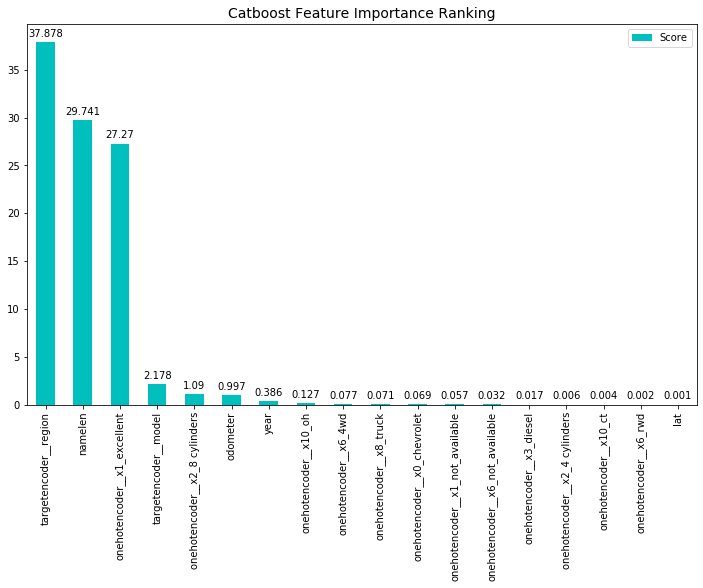

In [87]:
plt.rcParams["figure.figsize"] = (12,7)
ax = a.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = a['Score'].round(3)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

For each feature the value shows how much on average the prediction changes if the feature value changes.

In [93]:
cols = list(a['Feature'])
cols

['targetencoder__region',
 'namelen',
 'onehotencoder__x1_excellent',
 'targetencoder__model',
 'onehotencoder__x2_8 cylinders',
 'odometer',
 'year',
 'onehotencoder__x10_oh',
 'onehotencoder__x6_4wd',
 'onehotencoder__x8_truck',
 'onehotencoder__x0_chevrolet',
 'onehotencoder__x1_not_available',
 'onehotencoder__x6_not_available',
 'onehotencoder__x3_diesel',
 'onehotencoder__x2_4 cylinders',
 'onehotencoder__x10_ct',
 'onehotencoder__x6_rwd',
 'lat']

In [94]:
newdf=n3[['targetencoder__region',
 'namelen',
 'onehotencoder__x1_excellent',
 'targetencoder__model',
 'onehotencoder__x2_8 cylinders',
 'odometer',
 'year',
 'onehotencoder__x10_oh',
 'onehotencoder__x6_4wd',
 'onehotencoder__x8_truck',
 'onehotencoder__x0_chevrolet',
 'onehotencoder__x1_not_available',
 'onehotencoder__x6_not_available',
 'onehotencoder__x3_diesel',
 'onehotencoder__x2_4 cylinders',
 'onehotencoder__x10_ct',
 'onehotencoder__x6_rwd',
 'lat']]
model2 = CatBoostRegressor(iterations=10,learning_rate=0.7,
                          depth=5)
model2.fit(newdf,y_train)


0:	learn: 108135.5837624	total: 53.3ms	remaining: 479ms
1:	learn: 72567.9228464	total: 112ms	remaining: 447ms
2:	learn: 58860.8683567	total: 164ms	remaining: 382ms
3:	learn: 53225.3558921	total: 231ms	remaining: 347ms
4:	learn: 51715.6634852	total: 287ms	remaining: 287ms
5:	learn: 51479.0650161	total: 341ms	remaining: 227ms
6:	learn: 48196.9380209	total: 390ms	remaining: 167ms
7:	learn: 47097.8946857	total: 495ms	remaining: 124ms
8:	learn: 45398.3377033	total: 573ms	remaining: 63.7ms
9:	learn: 45078.4663912	total: 627ms	remaining: 0us


In [ ]:
scores = cross_val_score(model2, newdf, y_train,cv=5)
np.mean(scores)

0.7455575962574902

In [95]:
newdf1=n3test[['targetencoder__region',
 'namelen',
 'onehotencoder__x1_excellent',
 'targetencoder__model',
 'onehotencoder__x2_8 cylinders',
 'odometer',
 'year',
 'onehotencoder__x10_oh',
 'onehotencoder__x6_4wd',
 'onehotencoder__x8_truck',
 'onehotencoder__x0_chevrolet',
 'onehotencoder__x1_not_available',
 'onehotencoder__x6_not_available',
 'onehotencoder__x3_diesel',
 'onehotencoder__x2_4 cylinders',
 'onehotencoder__x10_ct',
 'onehotencoder__x6_rwd',
 'lat']]
model2.score(newdf1,y_test)

0.19426059555363184

The score improved on test set when only important features were selected.

# TASK 6

In [103]:
finaldf.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'namelen'],
      dtype='object')

In [142]:
df2=finaldf[['region','namelen','model','condition','manufacturer','fuel','drive','cylinders','odometer','year','state','price','lat','long']]
x=df2.drop(['price'],1)
y=df2['price']

In [143]:
x['condition'].fillna(value='not_available', inplace=True)
x['cylinders'].fillna(value='not_available', inplace=True)
x['drive'].fillna(value='not_available', inplace=True)

In [144]:
cnt=list(x.columns[x.dtypes !=object])
cnt

['namelen', 'odometer', 'year', 'lat', 'long']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=0,stratify=y_binned)
cont_preprocessing = make_pipeline(
    SimpleImputer(),StandardScaler())
cat_remaining=['manufacturer','model','fuel']
preprocess = make_column_transformer(
    (SimpleImputer(strategy='most_frequent'),cat_remaining),
    (cont_preprocessing,cnt),remainder='passthrough')
colname=cat_remaining+cnt+['region','condition','drive','cylinders','state']
print(colname)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

['manufacturer', 'model', 'fuel', 'namelen', 'odometer', 'year', 'lat', 'long', 'region', 'condition', 'drive', 'cylinders', 'state']


In [146]:
te1 =  preprocess.fit(X_train, y_train)

In [ ]:
ne=pd.DataFrame(te1.transform(X_train),columns=colname)
ne

In [148]:
preprocess1 = make_column_transformer(
    (TargetEncoder(),['model','region']),
    (OneHotEncoder(handle_unknown='ignore',sparse=False),['manufacturer', 'condition', 'cylinders', 'fuel', 'drive','state']),
    remainder='passthrough')

In [ ]:
model2 = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=5)
regr = make_pipeline(preprocess1,model2)
scores = cross_val_score(regr, ne, y_train,cv=5)
np.mean(scores)

0.7024953716455529

In [ ]:
regr.fit(ne,y_train)

In [154]:
n1=pd.DataFrame(te1.transform(X_test),columns=colname)
regr.score(n1,y_test)

0.18556805198160997

In [158]:
preprocess2 = make_column_transformer(
    (TargetEncoder(),['model','region']),
    (OneHotEncoder(handle_unknown='ignore',sparse=False),['manufacturer', 'condition', 'cylinders', 'fuel', 'drive','state']))
te1=preprocess2.fit(ne,y_train)
n1=pd.DataFrame(te1.transform(ne),columns=te1.get_feature_names())
cnt

['namelen', 'odometer', 'year', 'lat', 'long']

In [159]:
n2=n[['namelen', 'odometer', 'year', 'lat', 'long']]
n3=pd.concat([n1,n2],axis=1)
n3.head()

,targetencoder__model,targetencoder__region,onehotencoder__x0_acura,onehotencoder__x0_alfa-romeo,onehotencoder__x0_aston-martin,onehotencoder__x0_audi,onehotencoder__x0_bmw,onehotencoder__x0_buick,onehotencoder__x0_cadillac,onehotencoder__x0_chevrolet,...,onehotencoder__x5_vt,onehotencoder__x5_wa,onehotencoder__x5_wi,onehotencoder__x5_wv,onehotencoder__x5_wy,namelen,odometer,year,lat,long
0,19058.642857,11204.822894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.430431,-0.440928,0.955087,-0.810844,0.549958
1,5005.902712,15629.376101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.820437,3.46551e-16,-1.16038,-0.340363,-1.45587
2,29889.655172,15396.357834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.549721,-1.03601,1.11782,-0.773146,0.743882
3,3033.293939,8652.810680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.847362,0.864362,-0.672197,0.853347,0.646186
4,15180.149125,13049.536622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.55381,0.461297,-0.0212835,0.323009,0.41496


In [160]:
model = CatBoostRegressor(iterations=10,learning_rate=0.7,
                          depth=5)
model.fit(n3,y_train)

0:	learn: 108134.6686404	total: 70ms	remaining: 630ms
1:	learn: 72943.7748968	total: 122ms	remaining: 489ms
2:	learn: 59229.5517630	total: 223ms	remaining: 521ms
3:	learn: 53427.7249517	total: 274ms	remaining: 412ms
4:	learn: 52815.7557110	total: 341ms	remaining: 341ms
5:	learn: 51823.0260007	total: 400ms	remaining: 266ms
6:	learn: 51181.4244791	total: 481ms	remaining: 206ms
7:	learn: 49610.2178316	total: 556ms	remaining: 139ms
8:	learn: 48110.1950769	total: 640ms	remaining: 71.1ms
9:	learn: 45400.5396793	total: 714ms	remaining: 0us


In [161]:
l=model.get_feature_importance()
c=n3.columns

In [162]:
feature_score = pd.DataFrame(list(zip(c,l)),columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

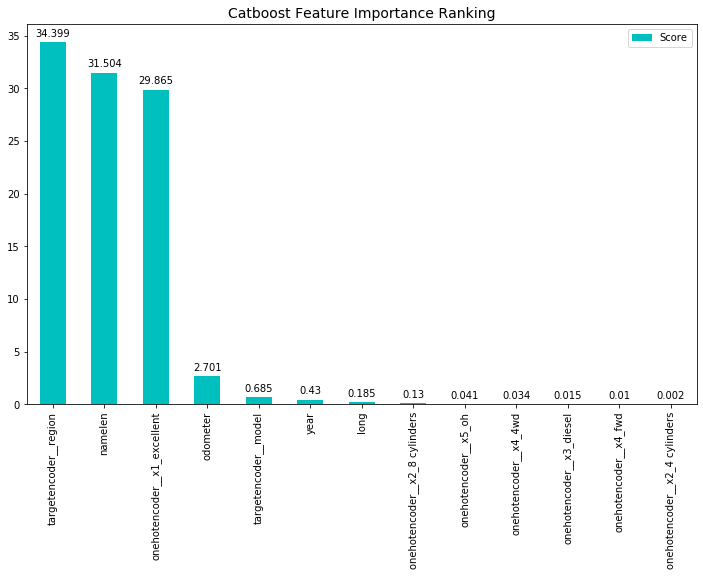

In [165]:
feature_score = feature_score.reset_index(drop=True)

a=feature_score.head(n=13)
plt.rcParams["figure.figsize"] = (12,7)
ax = a.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = a['Score'].round(3)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

The above model has very few but important features esp region,namelen and vehicles in excellent condition that give a score close enough to the best model.
As this model is already less complex, reducing the complexity by changing the parameter values or taking fewer features worsens the score. 